## Data Description
Details of the dataset
The dataset has 38765 rows of the purchase orders of people from the grocery stores. These orders can be analysed and association rules can be generated using Market Basket Analysis by algorithms like Apriori Algorithm.

some concepts involved: </br>Support: This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.</br>Confidence: This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears.</br>Lift: This says how likely item Y is purchased when item X is purchased while controlling for how popular item Y is.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
from mlxtend.frequent_patterns import apriori,association_rules,fpgrowth
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df = pd.read_csv('/Users/apple/Desktop/usm/MACHINE_LEARNING/assignment2/Groceries_dataset.csv')
df.head().T

,0,1,2,3,4
Member_number,1808,2552,2300,1187,3037
Date,21-07-2015,05-01-2015,19-09-2015,12-12-2015,01-02-2015
itemDescription,tropical fruit,whole milk,pip fruit,other vegetables,whole milk


In [3]:
df.shape

(38765, 3)

In [4]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
df.Date = pd.to_datetime(df.Date,dayfirst=True)
df.Member_number = df['Member_number'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  object        
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


In [7]:
print(f"Data date range: {min(df['Date'])} to {max(df['Date'])}")

Data date range: 2014-01-01 00:00:00 to 2015-12-30 00:00:00


## Data Observation

### Grouping statistics the number of `itemDescription`

In [8]:
transactions = df.groupby(['Member_number','Date'])
transactions.count()

itemDescription
Member_number Date                       
1000          2014-06-24                3
              2015-03-15                4
              2015-05-27                2
              2015-07-24                2
              2015-11-25                2
...                                   ...
4999          2015-05-16                2
              2015-12-26                2
5000          2014-03-09                2
              2014-11-16                2
              2015-02-10                3

[14963 rows x 1 columns]

### Now we gonna analysis the distribution of `itemDescription`

Text(0, 0.5, 'Item Name')

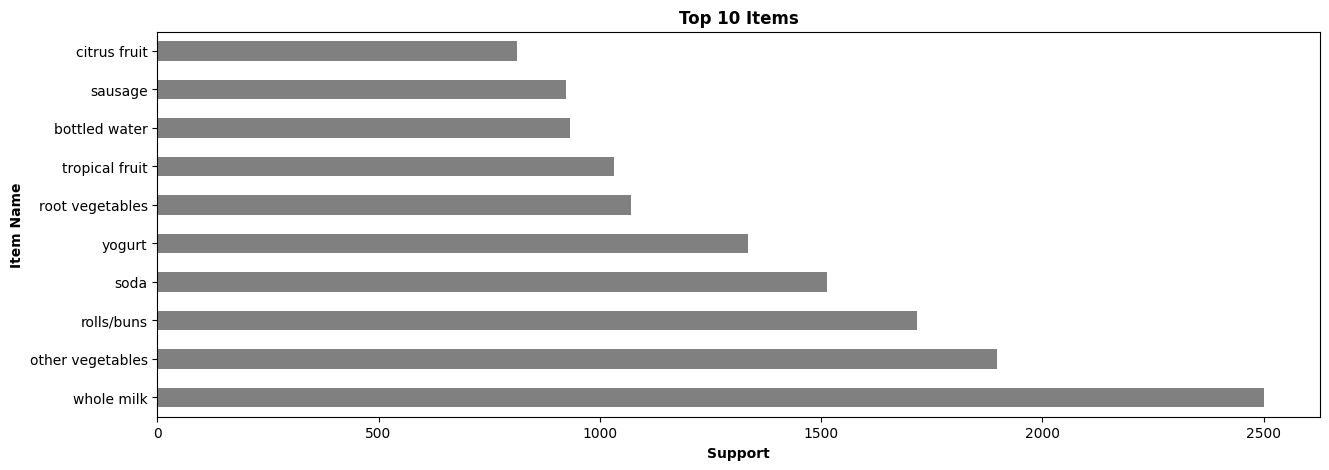

In [9]:
# analysis the top 10 items 
plt.figure(figsize=(15,5))
df['itemDescription'].value_counts()[:10].plot.barh(color='grey')

plt.title('Top 10 Items',fontweight='bold')
plt.xlabel('Support', fontweight='bold')
plt.ylabel('Item Name', fontweight='bold')

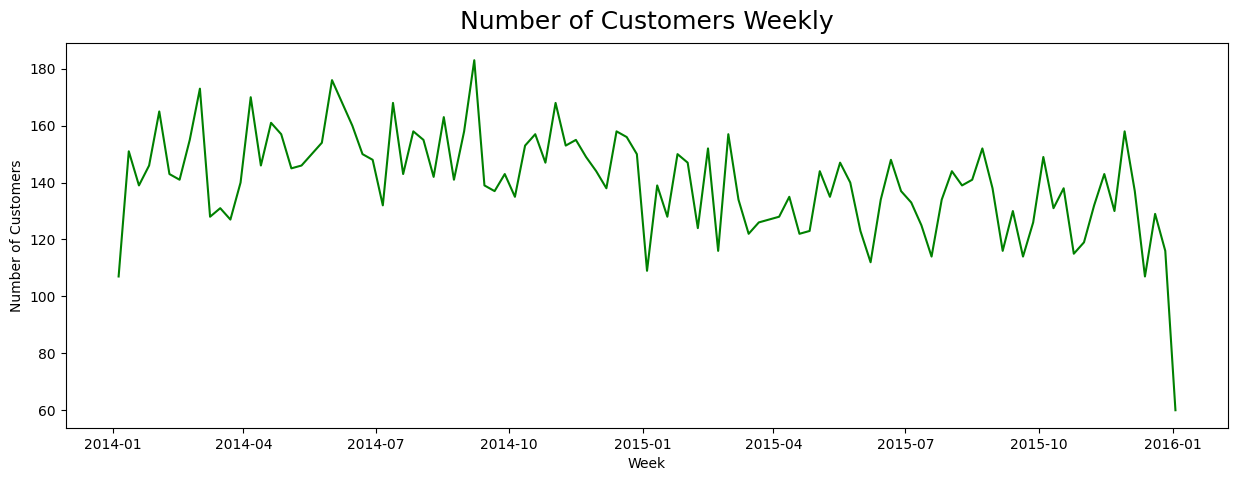

In [10]:
# number of customers weekly
plt.figure(figsize=(15,5))
Unique_customer_weekly = df.resample('w', on='Date').Member_number.nunique()
plt.plot(Unique_customer_weekly.index, Unique_customer_weekly,color='green')
plt.title('Number of Customers Weekly',pad=10,fontdict={'fontsize':18})
plt.ylabel('Number of Customers')
plt.xlabel('Week')
plt.show()

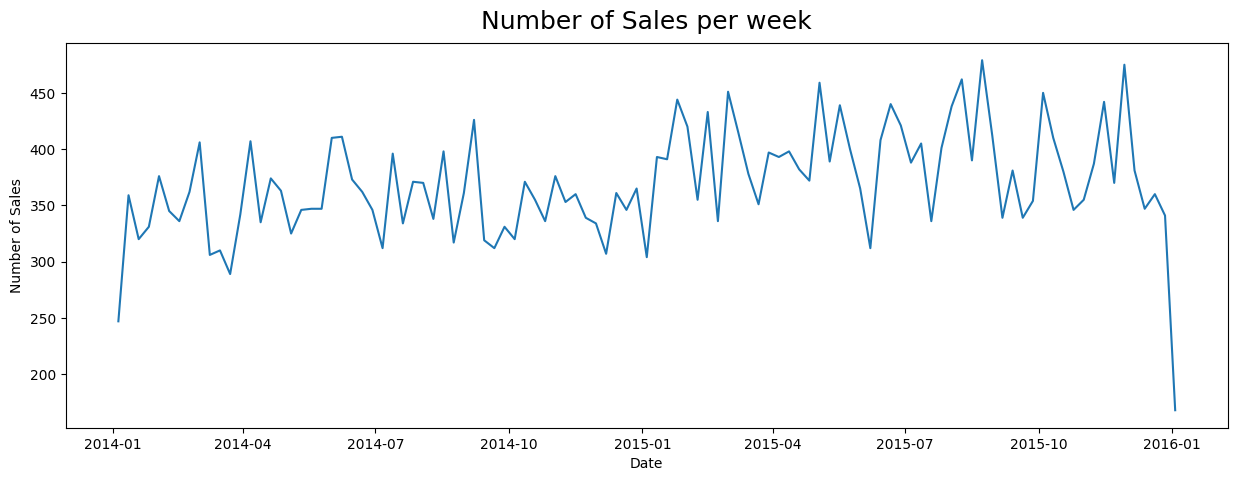

In [11]:
Sales_weekly = df.resample('w', on='Date').size()
plt.figure(figsize=(15,5))
plt.plot(Sales_weekly.index,Sales_weekly)
plt.title('Number of Sales per week',pad=10,fontdict={'fontsize':18})
plt.ylabel('Number of Sales')
plt.xlabel('Date')
plt.show()

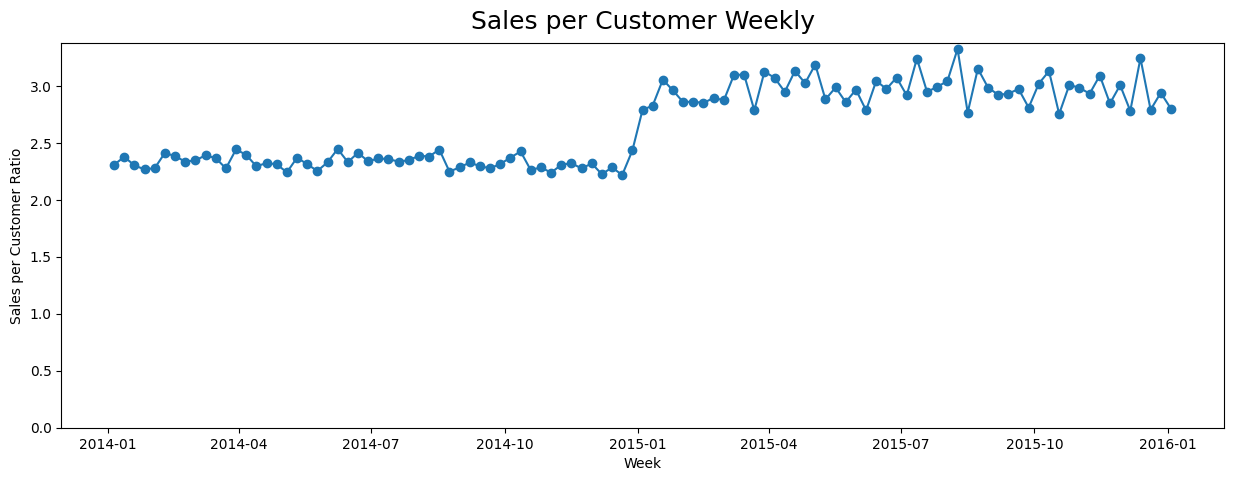

In [12]:
# Sales per Customer Weekly
plt.figure(figsize=(15,5))
Sales_per_Customer = Sales_weekly / Unique_customer_weekly
plt.plot(Sales_per_Customer.index, Sales_per_Customer,marker='o', linestyle='-')
plt.title('Sales per Customer Weekly',pad=10,fontdict={'fontsize':18})
plt.ylabel('Sales per Customer Ratio')
plt.xlabel('Week')
plt.ylim(bottom=0)

plt.show()

### Data Preparation

In [13]:
# split the `itemDescription`
transactions_lists = [i[1]['itemDescription'].tolist() for i in list(transactions)]
transactions_lists[:10]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['beef', 'white bread'],
 ['frankfurter', 'curd']]

In [14]:
te = TransactionEncoder()
te_ary = te.fit(transactions_lists).transform(transactions_lists)
transactions_te = pd.DataFrame(te_ary, columns=te.columns_)
transactions_te

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Association Rules Implementation

In [15]:
def plot_metrics_relationship(rule_matrix, col1, col2):
    
    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1], 
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} vs {}'.format(col1, col2))

### Apriori

In [16]:
apr_ = apriori(transactions_te)
apr_

,support,itemsets


In [17]:
# without the itemnama
apr_nonames = apriori(transactions_te, min_support=0.001)
apr_nonames

,support,itemsets
0,0.004010,(0)
1,0.021386,(1)
2,0.001470,(2)
3,0.001938,(3)
4,0.008087,(6)
...,...,...
745,0.001136,"(122, 164, 130)"
746,0.001002,"(122, 164, 138)"
747,0.001337,"(122, 164, 165)"
748,0.001069,"(130, 164, 138)"


In [18]:
# with itemnames
apr_names = apriori(transactions_te, min_support=0.001,use_colnames=True)
apr_names

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
...,...,...
745,0.001136,"(sausage, rolls/buns, whole milk)"
746,0.001002,"(soda, rolls/buns, whole milk)"
747,0.001337,"(yogurt, rolls/buns, whole milk)"
748,0.001069,"(sausage, soda, whole milk)"


In [19]:
apr_names_length_2 = apr_names[apr_names['itemsets'].apply(lambda x: len(x) == 2)]
apr_names_length_2

,support,itemsets
149,0.001069,"(bottled water, UHT-milk)"
150,0.002139,"(UHT-milk, other vegetables)"
151,0.001804,"(UHT-milk, rolls/buns)"
152,0.001002,"(UHT-milk, root vegetables)"
153,0.001136,"(sausage, UHT-milk)"
...,...,...
736,0.002941,"(whipped/sour cream, yogurt)"
737,0.003141,"(white bread, whole milk)"
738,0.001069,"(yogurt, white bread)"
739,0.001270,"(white wine, whole milk)"


In [20]:
apr_names_length_3 = apr_names[apr_names['itemsets'].apply(lambda x: len(x) == 3)]
apr_names_length_3

,support,itemsets
741,0.001136,"(soda, rolls/buns, other vegetables)"
742,0.001203,"(rolls/buns, other vegetables, whole milk)"
743,0.001136,"(soda, other vegetables, whole milk)"
744,0.001136,"(yogurt, other vegetables, whole milk)"
745,0.001136,"(sausage, rolls/buns, whole milk)"
746,0.001002,"(soda, rolls/buns, whole milk)"
747,0.001337,"(yogurt, rolls/buns, whole milk)"
748,0.001069,"(sausage, soda, whole milk)"
749,0.001470,"(sausage, yogurt, whole milk)"


In [21]:
rules = association_rules(apr_names, metric='confidence', min_threshold=0.05)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
1,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
2,(UHT-milk),(rolls/buns),0.021386,0.110005,0.001804,0.084375,0.767013,-0.000548,0.972009,-0.236873
3,(UHT-milk),(sausage),0.021386,0.060349,0.001136,0.053125,0.880298,-0.000154,0.992371,-0.121998
4,(UHT-milk),(soda),0.021386,0.097106,0.001270,0.059375,0.611444,-0.000807,0.959887,-0.393704
...,...,...,...,...,...,...,...,...,...,...
445,"(sausage, whole milk)",(soda),0.008955,0.097106,0.001069,0.119403,1.229612,0.000200,1.025320,0.188423
446,"(soda, whole milk)",(sausage),0.011629,0.060349,0.001069,0.091954,1.523708,0.000368,1.034806,0.347750
447,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877
448,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,0.481231


Confidence(X-> Y) = Support (X U Y) / Support (X)
In this case, confidence(X->Y) = support / antecedent support
Lift (X -> Y) = Support (X U Y) / (Support (Y) * Support (X))
In this case, Lift (X -> Y) = support / (antecedent support * consequent support)

In [22]:
rules['rules'] = rules['antecedents'].apply(lambda x: ', '.join(map(str, x))) + ' -> ' + rules['consequents'].apply(lambda x: ', '.join(map(str, x)))
new_order = ['antecedents',
 'consequents',
  'rules',
 'antecedent support',
 'consequent support',
 'support',
 'confidence',
 'lift']
association_df = rules[new_order]
association_df

,antecedents,consequents,rules,antecedent support,consequent support,support,confidence,lift
0,(UHT-milk),(bottled water),UHT-milk -> bottled water,0.021386,0.060683,0.001069,0.050000,0.823954
1,(UHT-milk),(other vegetables),UHT-milk -> other vegetables,0.021386,0.122101,0.002139,0.100000,0.818993
2,(UHT-milk),(rolls/buns),UHT-milk -> rolls/buns,0.021386,0.110005,0.001804,0.084375,0.767013
3,(UHT-milk),(sausage),UHT-milk -> sausage,0.021386,0.060349,0.001136,0.053125,0.880298
4,(UHT-milk),(soda),UHT-milk -> soda,0.021386,0.097106,0.001270,0.059375,0.611444
...,...,...,...,...,...,...,...,...
445,"(sausage, whole milk)",(soda),"sausage, whole milk -> soda",0.008955,0.097106,0.001069,0.119403,1.229612
446,"(soda, whole milk)",(sausage),"soda, whole milk -> sausage",0.011629,0.060349,0.001069,0.091954,1.523708
447,"(sausage, yogurt)",(whole milk),"sausage, yogurt -> whole milk",0.005748,0.157923,0.001470,0.255814,1.619866
448,"(sausage, whole milk)",(yogurt),"sausage, whole milk -> yogurt",0.008955,0.085879,0.001470,0.164179,1.911760


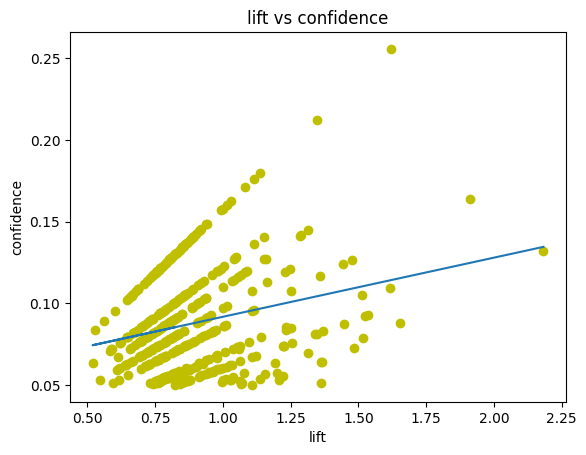

In [23]:
plot_metrics_relationship(association_df,col1='lift',col2='confidence')

### FP-Growth

In [24]:
fp_ = fpgrowth(transactions_te)
fp_

,support,itemsets


In [25]:
fp_nonames = fpgrowth(transactions_te, min_support=0.001)
fp_nonames

,support,itemsets
0,0.157923,(164)
1,0.051728,(105)
2,0.018780,(128)
3,0.085879,(165)
4,0.060349,(130)
...,...,...
745,0.001403,"(26, 165)"
746,0.001069,"(26, 102)"
747,0.001002,"(26, 138)"
748,0.001069,"(104, 164)"


In [26]:
fp_names = fpgrowth(transactions_te, min_support=0.001,use_colnames=True)
fp_names

,support,itemsets
0,0.157923,(whole milk)
1,0.051728,(pastry)
2,0.018780,(salty snack)
3,0.085879,(yogurt)
4,0.060349,(sausage)
...,...,...
745,0.001403,"(yogurt, chewing gum)"
746,0.001069,"(chewing gum, other vegetables)"
747,0.001002,"(soda, chewing gum)"
748,0.001069,"(pasta, whole milk)"


In [27]:
fp_names_length_2 = fp_names[fp_names['itemsets'].apply(lambda x: len(x) == 2)]
fp_names_length_2

,support,itemsets
149,0.006483,"(pastry, whole milk)"
150,0.002874,"(root vegetables, pastry)"
151,0.003676,"(pastry, other vegetables)"
152,0.003609,"(yogurt, pastry)"
153,0.003208,"(sausage, pastry)"
...,...,...
745,0.001403,"(yogurt, chewing gum)"
746,0.001069,"(chewing gum, other vegetables)"
747,0.001002,"(soda, chewing gum)"
748,0.001069,"(pasta, whole milk)"


In [28]:
fp_names_length_3 = fp_names[fp_names['itemsets'].apply(lambda x: len(x) == 3)]
fp_names_length_3

,support,itemsets
172,0.001136,"(yogurt, other vegetables, whole milk)"
173,0.001337,"(yogurt, rolls/buns, whole milk)"
182,0.001470,"(sausage, yogurt, whole milk)"
183,0.001136,"(sausage, rolls/buns, whole milk)"
184,0.001069,"(sausage, soda, whole milk)"
190,0.001136,"(soda, other vegetables, whole milk)"
191,0.001002,"(soda, rolls/buns, whole milk)"
192,0.001136,"(soda, rolls/buns, other vegetables)"
220,0.001203,"(rolls/buns, other vegetables, whole milk)"


In [29]:
fp_growth_rule = association_rules(fp_names, metric='confidence',min_threshold=0.05)
fp_growth_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(pastry),(whole milk),0.051728,0.157923,0.006483,0.125323,0.793571,-0.001686,0.962729,-0.215266
1,(pastry),(root vegetables),0.051728,0.069572,0.002874,0.055556,0.798538,-0.000725,0.985159,-0.210143
2,(pastry),(other vegetables),0.051728,0.122101,0.003676,0.071059,0.581972,-0.002640,0.945054,-0.431003
3,(pastry),(yogurt),0.051728,0.085879,0.003609,0.069767,0.812397,-0.000833,0.982681,-0.195832
4,(sausage),(pastry),0.060349,0.051728,0.003208,0.053156,1.027617,0.000086,1.001509,0.028601
...,...,...,...,...,...,...,...,...,...,...
445,(chewing gum),(yogurt),0.012030,0.085879,0.001403,0.116667,1.358508,0.000370,1.034855,0.267112
446,(chewing gum),(other vegetables),0.012030,0.122101,0.001069,0.088889,0.727994,-0.000400,0.963547,-0.274409
447,(chewing gum),(soda),0.012030,0.097106,0.001002,0.083333,0.858167,-0.000166,0.984975,-0.143312
448,(pasta),(whole milk),0.008087,0.157923,0.001069,0.132231,0.837316,-0.000208,0.970394,-0.163793


### select columns what we need 

In [30]:
fp_growth_rule['rules'] = fp_growth_rule['antecedents'].apply(lambda x: ', '.join(map(str, x))) + ' -> ' + fp_growth_rule['consequents'].apply(lambda x: ', '.join(map(str, x)))

fp_growth_df = fp_growth_rule[new_order]
fp_growth_df

,antecedents,consequents,rules,antecedent support,consequent support,support,confidence,lift
0,(pastry),(whole milk),pastry -> whole milk,0.051728,0.157923,0.006483,0.125323,0.793571
1,(pastry),(root vegetables),pastry -> root vegetables,0.051728,0.069572,0.002874,0.055556,0.798538
2,(pastry),(other vegetables),pastry -> other vegetables,0.051728,0.122101,0.003676,0.071059,0.581972
3,(pastry),(yogurt),pastry -> yogurt,0.051728,0.085879,0.003609,0.069767,0.812397
4,(sausage),(pastry),sausage -> pastry,0.060349,0.051728,0.003208,0.053156,1.027617
...,...,...,...,...,...,...,...,...
445,(chewing gum),(yogurt),chewing gum -> yogurt,0.012030,0.085879,0.001403,0.116667,1.358508
446,(chewing gum),(other vegetables),chewing gum -> other vegetables,0.012030,0.122101,0.001069,0.088889,0.727994
447,(chewing gum),(soda),chewing gum -> soda,0.012030,0.097106,0.001002,0.083333,0.858167
448,(pasta),(whole milk),pasta -> whole milk,0.008087,0.157923,0.001069,0.132231,0.837316


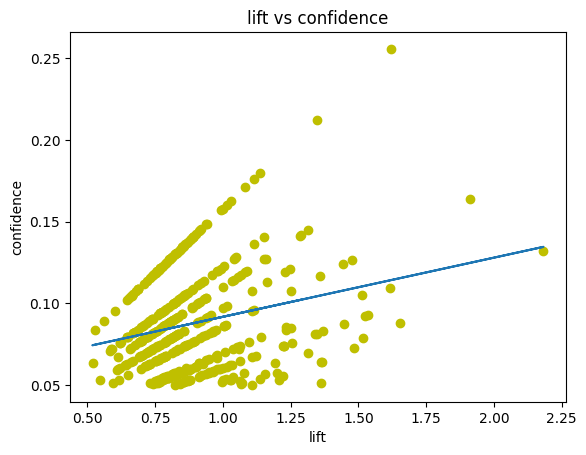

In [31]:
plot_metrics_relationship(fp_growth_df,col1='lift',col2='confidence')

## Comparison

In [32]:
def different_algo_texecution(transact_items,type, min_support=0.001):
    
    start_time = 0
    total_execution = 0
    
    if(type=="apriori"):
        start_time = time.time()
        rule_items = apriori(transact_items, min_support=min_support, use_colnames=True)
        time_execution = time.time() - start_time
        
    else:
        start_time = time.time()
        rule_items = fpgrowth(transact_items, min_support=min_support, use_colnames=True)
        time_execution = time.time() - start_time
    
    # rule_items['number_of_items'] = rule_items['itemsets'].apply(lambda x: len(x))
    return time_execution

In [33]:
apriori_time = different_algo_texecution(transactions_te, 'apriori')
fp_growth_time = different_algo_texecution(transactions_te, 'fp')

algos = ['Apriori', 'FP-Growth']
execution_times = [apriori_time, fp_growth_time]

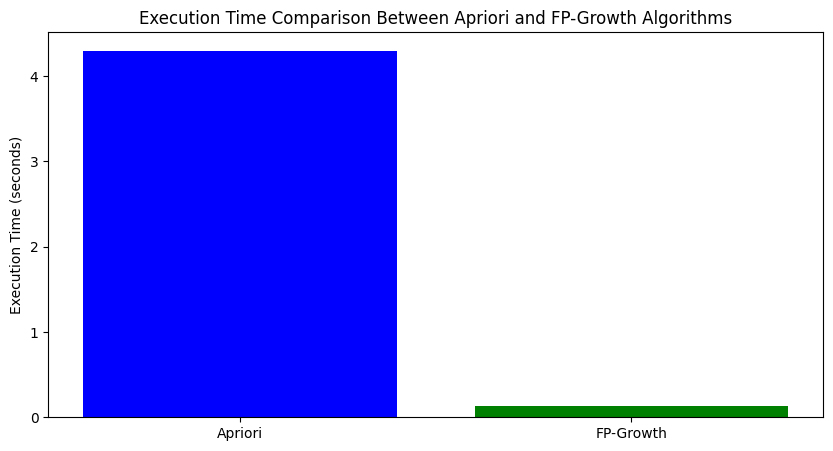

In [34]:
plt.figure(figsize=(10,5))
plt.bar(algos, execution_times,color=['blue', 'green'])
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison Between Apriori and FP-Growth Algorithms')
plt.show()